## Penggunaan Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=['ID','Fitur 1','Fitur 2','Fitur 3', 'Fitur 4', 'Fitur 5', 'Fitur 6', 'Fitur 7', 'Fitur 8', 'Fitur 9', 'Kelas'])
data = data.replace(to_replace = '?', value = np.NaN)
data['Fitur 6'].fillna(data['Fitur 6'].median(), inplace=True)

In [3]:
data['Fitur 6'] = data['Fitur 6'].astype(float).astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID         699 non-null int64
Fitur 1    699 non-null int64
Fitur 2    699 non-null int64
Fitur 3    699 non-null int64
Fitur 4    699 non-null int64
Fitur 5    699 non-null int64
Fitur 6    699 non-null int64
Fitur 7    699 non-null int64
Fitur 8    699 non-null int64
Fitur 9    699 non-null int64
Kelas      699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


In [4]:
raw_data = data.iloc[:,1:-1]
print(raw_data)

     Fitur 1  Fitur 2  Fitur 3  Fitur 4  Fitur 5  Fitur 6  Fitur 7  Fitur 8  \
0          5        1        1        1        2        1        3        1   
1          5        4        4        5        7       10        3        2   
2          3        1        1        1        2        2        3        1   
3          6        8        8        1        3        4        3        7   
4          4        1        1        3        2        1        3        1   
..       ...      ...      ...      ...      ...      ...      ...      ...   
694        3        1        1        1        3        2        1        1   
695        2        1        1        1        2        1        1        1   
696        5       10       10        3        7        3        8       10   
697        4        8        6        4        3        4       10        6   
698        4        8        8        5        4        5       10        4   

     Fitur 9  
0          1  
1          1  
2     

In [5]:
class_data = data.iloc[:,-1:]
print(class_data)

     Kelas
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]


### Algoritma KNN

In [6]:
knn = KNeighborsClassifier(algorithm='auto', p=1, metric='manhattan', n_neighbors = 3)

### Datasplit dengan Cross Validation dengan fold 10

In [7]:
scores = cross_val_score(knn, raw_data, class_data, cv=10, scoring='accuracy')

print(scores)

print(scores.mean())

[0.88732394 0.95714286 0.97142857 0.92857143 1.         0.97142857
 0.98571429 0.98571429 0.98550725 1.        ]
0.9672831190038783


### Mencari nilai K dengan akurasi terbaik 

nilai k optimal: 3
Dengan akurasi sebesar: 0.9644460968710817


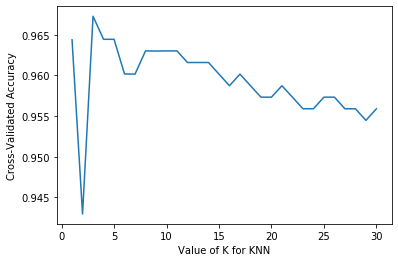

In [10]:
k_range = range(1, 31)
k_scores = []
maks = 0
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', p=1, metric='manhattan', n_neighbors=k)
    scores = cross_val_score(knn, raw_data, class_data, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    if(scores.mean() > maks):
        maks = scores.mean()
        nilai_k = k
    # plot to see clearly
print("nilai k optimal:",nilai_k)
print("Dengan akurasi sebesar:",k_scores[nilai_k])
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()